# Libraries

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size':21})
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, \
                                    GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, \
                            recall_score, f1_score, plot_confusion_matrix, plot_roc_curve

# Constant

In [131]:
FIG_SIZE = (22, 8)

# Exploring Our Data

In [132]:
df = pd.read_csv(r'C:\Users\Doan Trong Hieu\Downloads\IMPORTANT\SPECIALIZATION\AI\MACHINE-LEARNING\CODE_ML\UDM_ZTM_ML\data\heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


1    165
0    138
Name: target, dtype: int64 



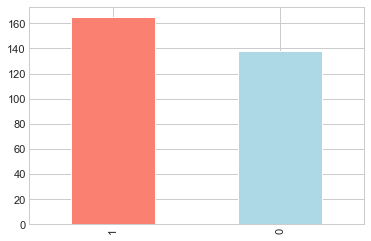

In [133]:
print(df['target'].value_counts(), '\n')
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [134]:
print(df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None 



In [135]:
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [136]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Finding Patterns

1    207
0     96
Name: sex, dtype: int64 

sex      0    1
target         
0       24  114
1       72   93 



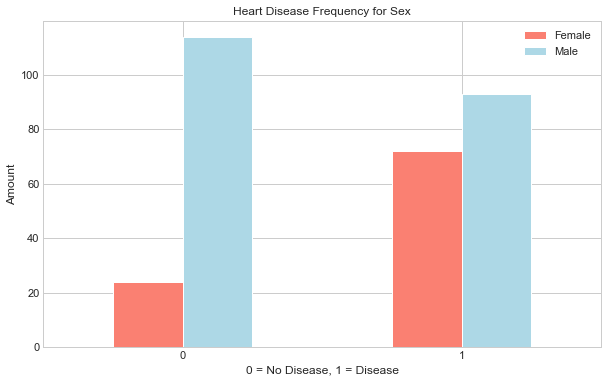

In [137]:
print(df['sex'].value_counts(), '\n')
print(pd.crosstab(df['target'], df['sex']), '\n')
pd.crosstab(df['target'], df['sex']).plot(kind='bar', figsize=(10, 6), color=['salmon', 'lightblue']);
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)
plt.show()

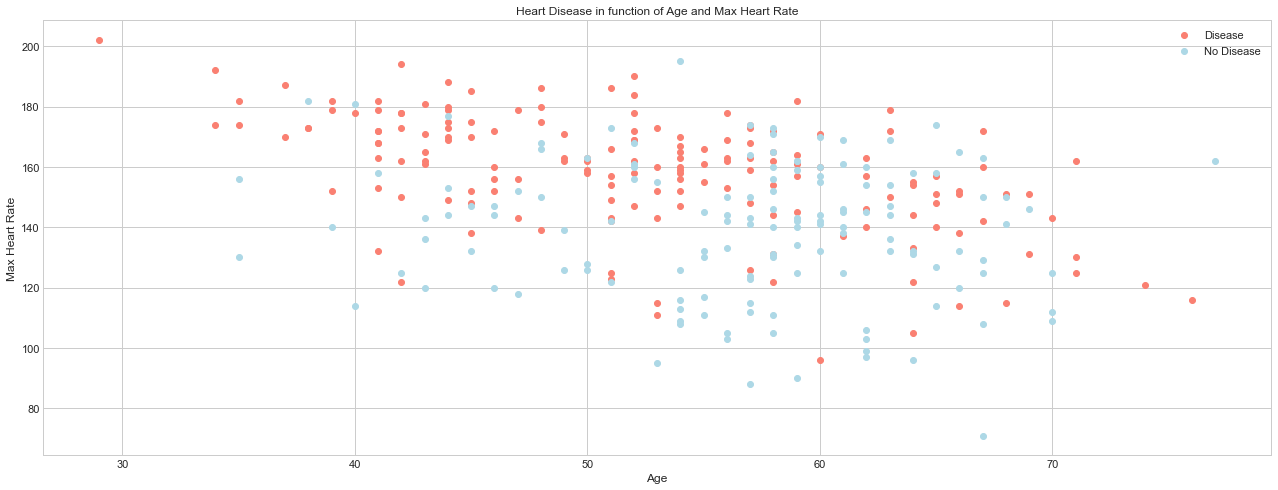

In [138]:
plt.figure(figsize=FIG_SIZE)
plt.scatter(df['age'][df['target'] == 1],
            df['thalach'][df['target'] == 1],
            c='salmon')
plt.scatter(df['age'][df['target'] == 0],
            df['thalach'][df['target'] == 0],
            c='lightblue')
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])
plt.show()

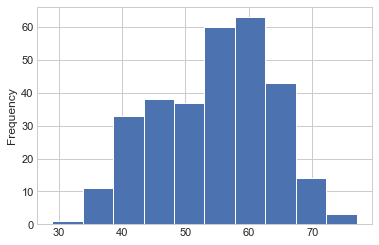

In [139]:
df.age.plot.hist();

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16 



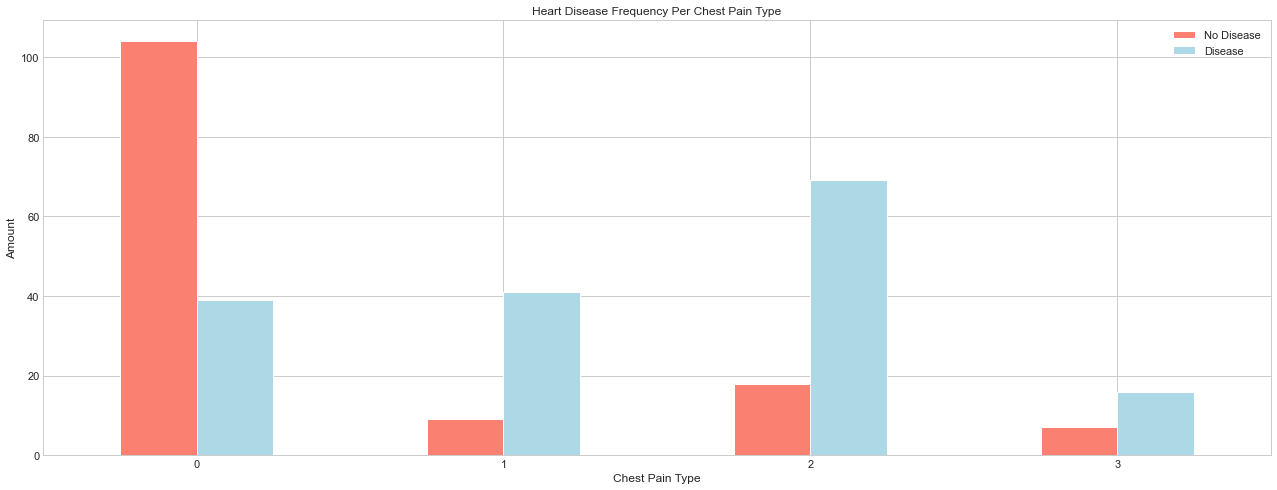

In [140]:
print(pd.crosstab(df.cp, df.target), '\n')
pd.crosstab(df.cp, df.target).plot.bar(figsize=FIG_SIZE, color=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0)
plt.show()

In [141]:
np.round(df.corr(), 3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000,-0.098,-0.069,0.279,0.214,0.121,-0.116,-0.399,0.097,0.210,-0.169,0.276,0.068,-0.225
sex,-0.098,1.000,-0.049,-0.057,-0.198,0.045,-0.058,-0.044,0.142,0.096,-0.031,0.118,0.210,-0.281
cp,-0.069,-0.049,1.000,0.048,-0.077,0.094,0.044,0.296,-0.394,-0.149,0.120,-0.181,-0.162,0.434
trestbps,0.279,-0.057,0.048,1.000,0.123,0.178,-0.114,-0.047,0.068,0.193,-0.121,0.101,0.062,-0.145
chol,0.214,-0.198,-0.077,0.123,1.000,0.013,-0.151,-0.010,0.067,0.054,-0.004,0.071,0.099,-0.085
fbs,0.121,0.045,0.094,0.178,0.013,1.000,-0.084,-0.009,0.026,0.006,-0.060,0.138,-0.032,-0.028
restecg,-0.116,-0.058,0.044,-0.114,-0.151,-0.084,1.000,0.044,-0.071,-0.059,0.093,-0.072,-0.012,0.137
thalach,-0.399,-0.044,0.296,-0.047,-0.010,-0.009,0.044,1.000,-0.379,-0.344,0.387,-0.213,-0.096,0.422
exang,0.097,0.142,-0.394,0.068,0.067,0.026,-0.071,-0.379,1.000,0.288,-0.258,0.116,0.207,-0.437
oldpeak,0.210,0.096,-0.149,0.193,0.054,0.006,-0.059,-0.344,0.288,1.000,-0.578,0.223,0.210,-0.431


In [142]:
def plot_correlation_matrix(data_frame, figsize=FIG_SIZE):
    corr_matrix = data_frame.corr()
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.heatmap(data=corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap='YlGnBu')
    plt.xticks(rotation=45)
    plt.show()

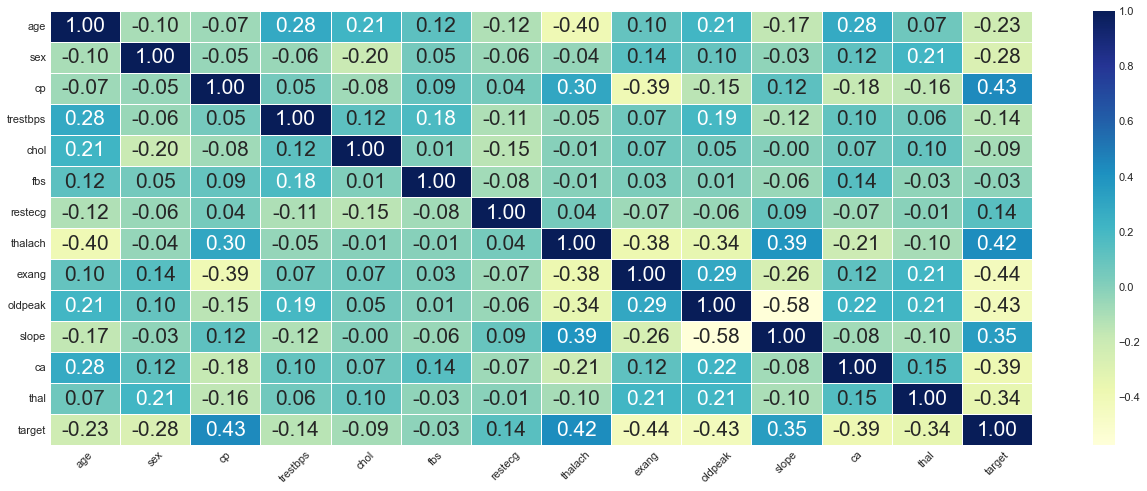

In [143]:
plot_correlation_matrix(data_frame=df, figsize=FIG_SIZE)

# Preparing Our Data For Machine Learning

In [144]:
X = df.drop('target', axis=1)
y = df['target']

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Choosing The Right Models

In [145]:
models = {  'Logistic Regression': LogisticRegression(),
            'KNN':                 KNeighborsClassifier(),
            'Random Forest':       RandomForestClassifier() }

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    
    for (name, model) in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

# Experimenting With Machine Learning Models

In [146]:
model_scores = fit_and_score(   models=models, X_train=X_train, X_test=X_test,
                                y_train=y_train, y_test=y_test  )

print(model_scores)

C:\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


{'Logistic Regression': 0.8852459016393442, 'KNN': 0.6885245901639344, 'Random Forest': 0.8360655737704918}


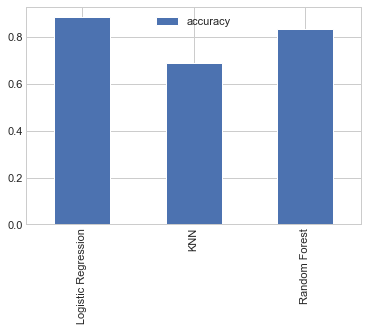

In [147]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()
plt.show()

# Tuning/Improving Our Model

C:\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature

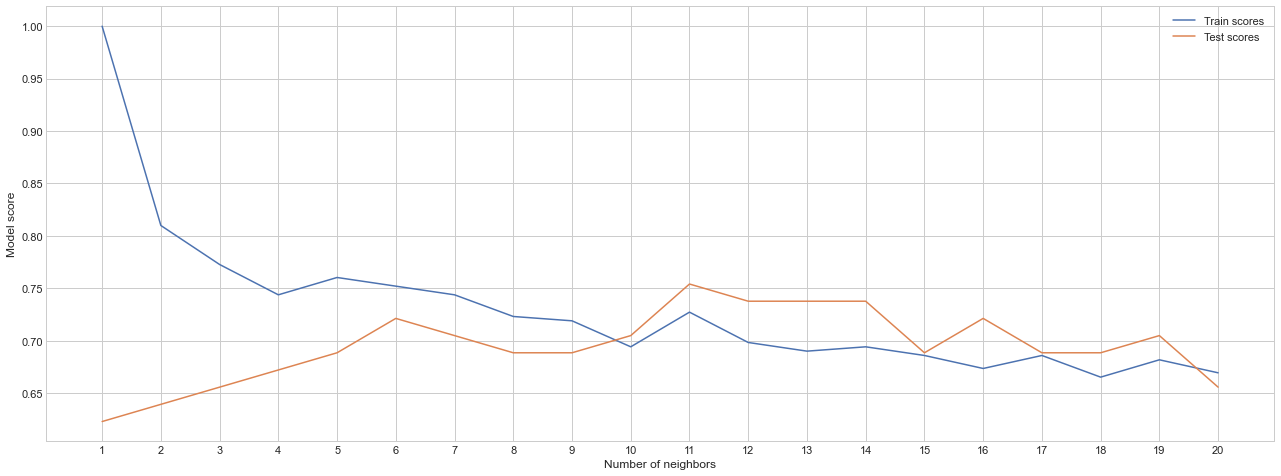

Maximum KNN score on the test data: 75.41%


In [148]:
train_scores = []
test_scores  = []

neighbors = range(1, 21)
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

plt.figure(figsize=FIG_SIZE)
plt.plot(neighbors, train_scores, label='Train scores')
plt.plot(neighbors, test_scores, label='Test scores')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()
plt.show()

print(f'Maximum KNN score on the test data: {max(test_scores) * 100:.2f}%')

# Tuning Hyperparameters

In [149]:
log_reg_grid = {    'C': np.logspace(-4, 4, 20),
                    'solver': ['liblinear'] }
rf_grid = { 'n_estimators': np.arange(10, 1000, 50),
            'max_depth': [None, 3, 5, 10],
            'min_samples_split': np.arange(2, 20, 2),
            'min_samples_leaf': np.arange(1, 20, 2) }

In [150]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log_reg.fit(X_train, y_train)

print(rs_log_reg.best_params_)
print(rs_log_reg.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'solver': 'liblinear', 'C': 0.23357214690901212}
0.8852459016393442


In [151]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)
rs_rf.fit(X_train, y_train)

print(rs_rf.best_params_)
print(rs_rf.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear']}
gs_log_reg = GridSearchCV(  LogisticRegression(),
                            param_grid=log_reg_grid,
                            cv=5,
                            verbose=True    )
gs_log_reg.fit(X_train, y_train);
print(gs_log_reg.best_params_)
print(gs_log_reg.score(X_test, y_test))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'C': 0.20433597178569418, 'solver': 'liblinear'}
0.8852459016393442


In [159]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [166]:
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(np.round(cv_acc, 2))
print(np.round(np.mean(cv_acc), 2), '\n')

cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
print(np.round(cv_precision, 2))
print(np.round(np.mean(cv_precision), 2), '\n')

cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
print(np.round(cv_recall, 2))
print(np.round(np.mean(cv_recall), 2), '\n')

cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
print(np.round(cv_f1, 2))
print(np.round(np.mean(cv_f1), 2), '\n')

[0.82 0.9  0.89 0.88 0.75]
0.85 

[0.78 0.89 0.86 0.86 0.72]
0.82 

[0.94 0.94 0.94 0.94 0.88]
0.93 

[0.85 0.91 0.9  0.9  0.79]
0.87 



# Finding The Most Important Features

[[ 0.00316728 -0.86044675  0.66067032 -0.01156993 -0.00166375  0.04386101
   0.31275865  0.02459362 -0.60413094 -0.5686279   0.45051633 -0.63609907
  -0.67663375]] 

{'age': 0.0031672830677295966, 'sex': -0.8604467464181768, 'cp': 0.6606703196786501, 'trestbps': -0.011569931725970527, 'chol': -0.0016637456109837993, 'fbs': 0.04386101205953376, 'restecg': 0.3127586484717099, 'thalach': 0.024593615841597527, 'exang': -0.6041309444844618, 'oldpeak': -0.5686278978594388, 'slope': 0.45051632904765737, 'ca': -0.6360990721560912, 'thal': -0.67663374706138} 



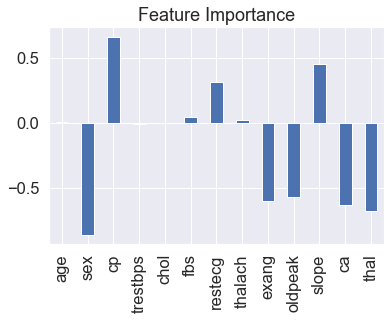

In [179]:
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

clf.fit(X_train, y_train)
print(clf.coef_, '\n')

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
print(feature_dict, '\n')

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);

In [183]:
print(pd.crosstab(df.sex, df.target), '\n')
print(pd.crosstab(df.slope, df.target), '\n')


target    0   1
sex            
0        24  72
1       114  93 

target   0    1
slope          
0       12    9
1       91   49
2       35  107 

